In [1]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
import xgboost as xgb
from xgboost import XGBClassifier
import re


In [2]:
df = pd.read_csv("ipl_matches.csv")

In [3]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
df.drop(columns={'id','umpire3','date'},inplace=True)

In [7]:
df.drop_duplicates()

,Season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,IPL-2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,IPL-2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,IPL-2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,IPL-2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,IPL-2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,IPL-2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,IPL-2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,IPL-2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,IPL-2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [8]:
df = df.dropna(subset=['player_of_match', 'winner'])

In [9]:
df.shape

(752, 15)

In [10]:
df['city'].isnull().sum()

7

In [11]:
null_city = df[df['city'].isnull()]
print(null_city[['venue', 'city']])

                                   venue city
461  Dubai International Cricket Stadium  NaN
462  Dubai International Cricket Stadium  NaN
466  Dubai International Cricket Stadium  NaN
468  Dubai International Cricket Stadium  NaN
469  Dubai International Cricket Stadium  NaN
474  Dubai International Cricket Stadium  NaN
476  Dubai International Cricket Stadium  NaN


In [12]:
city_for_dubai = df[df['venue'] == "Dubai International Cricket Stadium"]['city'].dropna().unique()
print(city_for_dubai)

[]


In [13]:
df['city'].fillna("Dubai",inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season           752 non-null    object
 1   city             752 non-null    object
 2   team1            752 non-null    object
 3   team2            752 non-null    object
 4   toss_winner      752 non-null    object
 5   toss_decision    752 non-null    object
 6   result           752 non-null    object
 7   dl_applied       752 non-null    int64 
 8   winner           752 non-null    object
 9   win_by_runs      752 non-null    int64 
 10  win_by_wickets   752 non-null    int64 
 11  player_of_match  752 non-null    object
 12  venue            752 non-null    object
 13  umpire1          750 non-null    object
 14  umpire2          750 non-null    object
dtypes: int64(3), object(12)
memory usage: 94.0+ KB


In [15]:
df['year'] = df['Season'].str.extract(r'(\d{4})')
df['year'] = df['year'].astype(int)
df = df.drop('Season', axis=1)

In [16]:
df['umpire1'].fillna('Unknown',inplace=True)

In [17]:
df['umpire2'].fillna('Unknown',inplace=True)

In [18]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [19]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [20]:
team_map = {
    'Rising Pune Supergiant': 'Pune Warriors',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Delhi Daredevils': 'Delhi Capitals'
}
columns = ['team1', 'team2', 'toss_winner', 'winner']
for col in columns:
    df[col] = df[col].replace(team_map)


In [21]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Pune Warriors', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [22]:
df['venue'].nunique()

41

In [23]:
def clean_stadium(name: str) -> str:

    if pd.isna(name):
        return name
    name = str(name).lower().replace('.', '')
    name = re.sub(r'\bintl\b|\bint\b', 'international', name)
    name = re.sub(r'\bacademy\b', 'academy', name)
    name = re.sub(r'\baca[- ]?vdca\b', 'aca vdca', name)
    name = re.sub(r'\s+', ' ', name).strip()

    if ',' in name:
        first, _ = [p.strip() for p in name.split(',', 1)]
        if first.endswith('stadium'):
            name = first
    mapping = {
        'feroz shah kotla':                                'arun jaitley stadium',
        'feroz shah kotla ground':                         'arun jaitley stadium',
        'punjab cricket association stadium mohali':       'is bindra stadium',
        'punjab cricket association is bindra stadium':    'is bindra stadium',
        'rajiv gandhi international stadium uppal':        'rajiv gandhi international stadium',
        'rajiv gandhi intl cricket stadium':               'rajiv gandhi international stadium',
        'rajiv gandhi international cricket stadium':      'rajiv gandhi international stadium',
        'ma chidambaram stadium chepauk':                  'm a chidambaram stadium',
        'ma chidambaram stadium':                          'm a chidambaram stadium',
        'aca vdca stadium':                                'aca-vdca stadium',
        'dr ys rajasekhara reddy aca vdca cricket stadium':'aca-vdca stadium',
        "st george's park":                                "st george's park"
    }

    name = mapping.get(name, name)
    return name.title()         

df['venue_clean'] = df['venue'].apply(clean_stadium)

cleaned = sorted({clean_stadium(n) for n in df['venue'].unique()})
for c in cleaned:
    print('-', c)


- Aca-Vdca Stadium
- Arun Jaitley Stadium
- Barabati Stadium
- Brabourne Stadium
- Buffalo Park
- De Beers Diamond Oval
- Dr Dy Patil Sports Academy
- Dubai International Cricket Stadium
- Eden Gardens
- Green Park
- Himachal Pradesh Cricket Association Stadium
- Holkar Cricket Stadium
- Is Bindra Stadium
- Jsca International Stadium Complex
- Kingsmead
- M A Chidambaram Stadium
- M Chinnaswamy Stadium
- Maharashtra Cricket Association Stadium
- Nehru Stadium
- New Wanderers Stadium
- Newlands
- Outsurance Oval
- Punjab Cricket Association Stadium
- Rajiv Gandhi International Stadium
- Sardar Patel Stadium
- Saurashtra Cricket Association Stadium
- Sawai Mansingh Stadium
- Shaheed Veer Narayan Singh International Stadium
- Sharjah Cricket Stadium
- Sheikh Zayed Stadium
- St George'S Park
- Subrata Roy Sahara Stadium
- Supersport Park
- Vidarbha Cricket Association Stadium
- Wankhede Stadium


In [24]:
df['venue_clean'].nunique()

35

In [25]:
df.drop('venue',inplace=True,axis=1)

In [26]:
df['venue'] = df['venue_clean']

In [27]:
df.drop('venue_clean',inplace=True,axis=1)

In [28]:
df.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,year,venue
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,AY Dandekar,NJ Llong,2017,Rajiv Gandhi International Stadium
1,Pune,Mumbai Indians,Pune Warriors,Pune Warriors,field,normal,0,Pune Warriors,0,7,SPD Smith,A Nand Kishore,S Ravi,2017,Maharashtra Cricket Association Stadium
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Nitin Menon,CK Nandan,2017,Saurashtra Cricket Association Stadium
3,Indore,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,AK Chaudhary,C Shamshuddin,2017,Holkar Cricket Stadium
4,Bangalore,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,Unknown,Unknown,2017,M Chinnaswamy Stadium


In [29]:
df['result'].unique()

array(['normal', 'tie'], dtype=object)

In [30]:
df['player_of_match'].nunique()

226

In [31]:
df['year'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [32]:
mask = (df['team1'] == 'Kochi Tuskers Kerala') | (df['team2'] == 'Kochi Tuskers Kerala')
years_played = df.loc[mask, 'year'].unique()
print("Kochi Tuskers Kerala played in the year:", sorted(years_played))

Kochi Tuskers Kerala played in the year: [2011]


In [33]:
df = df[~df[['team1', 'team2']].eq('Kochi Tuskers Kerala').any(axis=1)].copy()

In [34]:
mask = (df['team1'] == 'Gujarat Lions') | (df['team2'] == 'Gujarat Lions')
years_played = df.loc[mask, 'year'].unique()
print("Gujarat Lions played in the year:", sorted(years_played))

Gujarat Lions played in the year: [2016, 2017]


In [35]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Pune Warriors', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers'],
      dtype=object)

# EDA Analysis

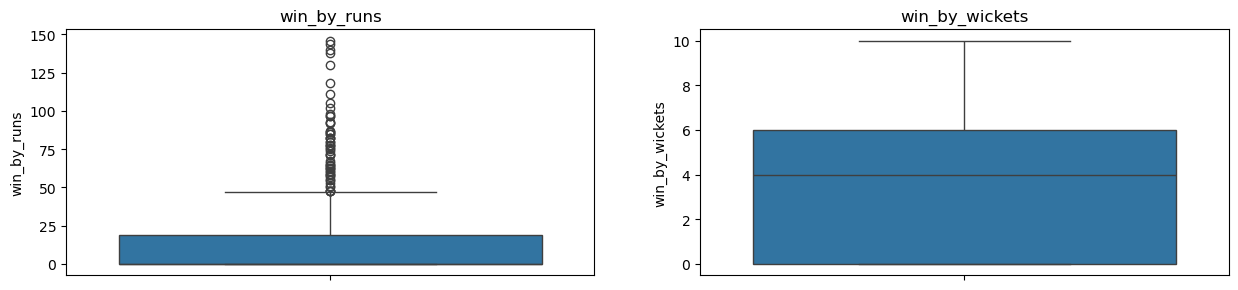

In [37]:
numeric_columns = df[['win_by_runs','win_by_wickets']]

plt.figure(figsize=(15, 30))
for i in range(len(numeric_columns.columns)):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(y=numeric_columns.columns[i], data=df)
    plt.title(numeric_columns.columns[i])

plt.show()

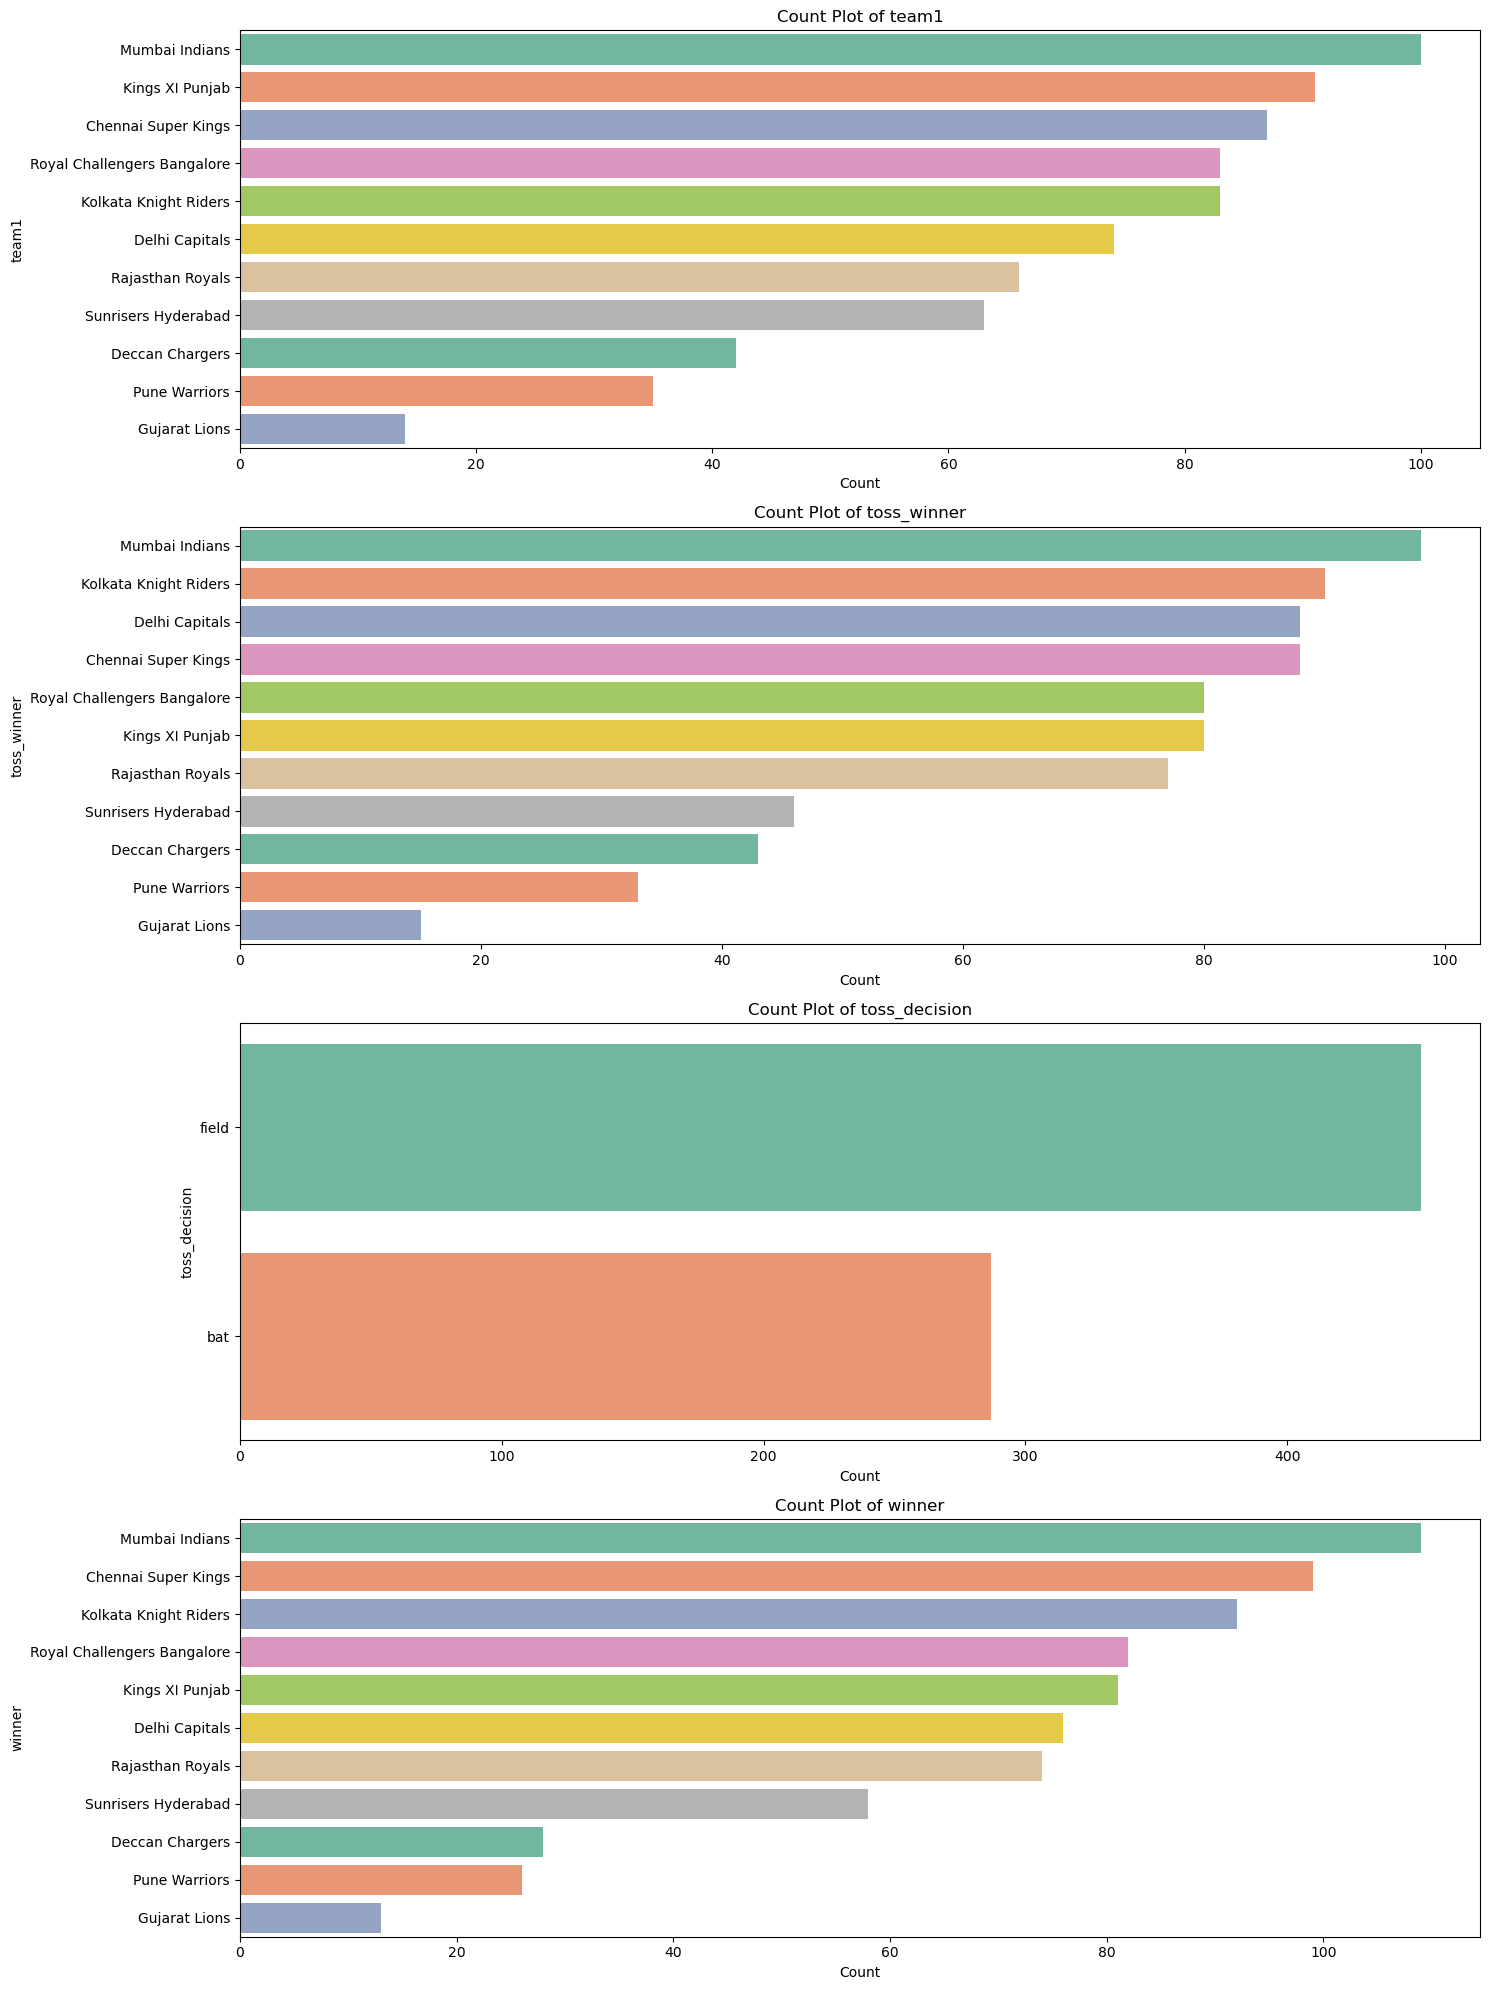

In [38]:
categorical_cols = ['team1', 'toss_winner', 'toss_decision', 'winner']

plt.figure(figsize=(15, 20))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.ylabel(col)
    plt.xlabel('Count')
plt.tight_layout()
plt.show()


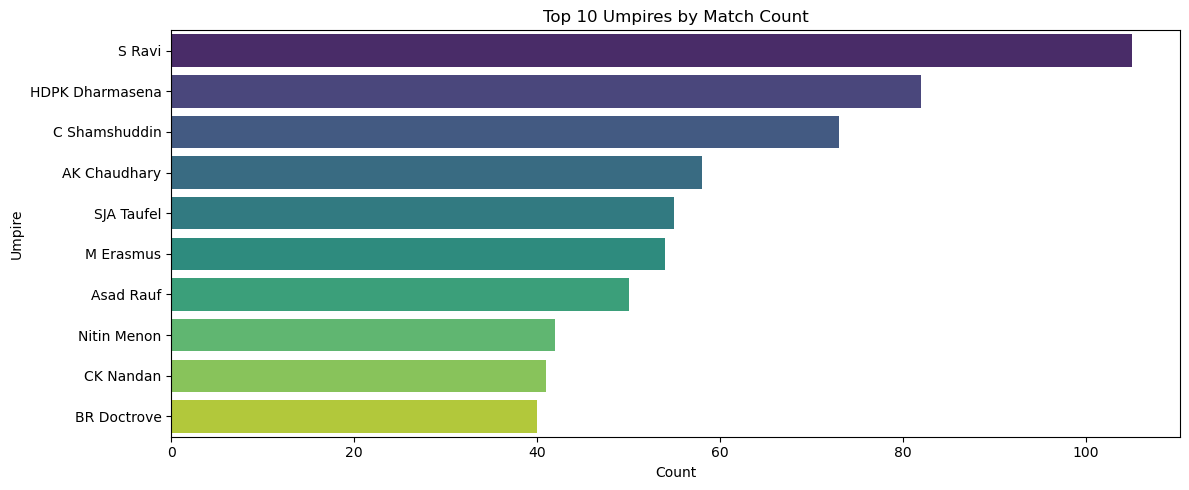

In [39]:
umpires = pd.concat([df['umpire1'], df['umpire2']])
top_umpires = umpires.value_counts().head(10).index

plt.figure(figsize=(12,5))
sns.countplot(y=umpires[umpires.isin(top_umpires)], order=top_umpires, palette='viridis')
plt.title('Top 10 Umpires by Match Count')
plt.xlabel('Count')
plt.ylabel('Umpire')
plt.tight_layout()
plt.show()


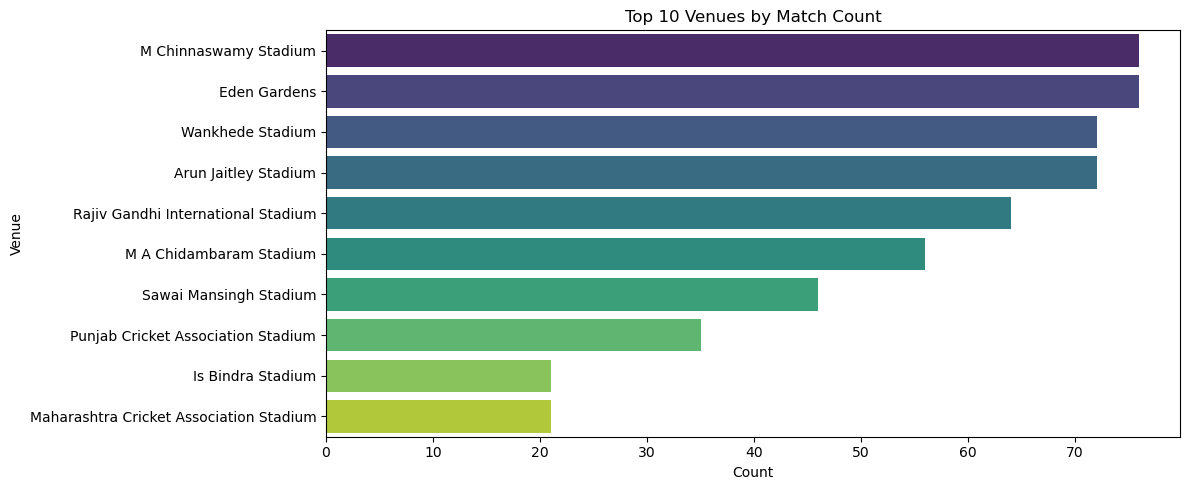

In [40]:
top_venues = df['venue'].value_counts().head(10).index
plt.figure(figsize=(12, 5))
sns.countplot(y='venue', data=df[df['venue'].isin(top_venues)],
              order=top_venues, palette='viridis')
plt.title('Top 10 Venues by Match Count')
plt.ylabel('Venue')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


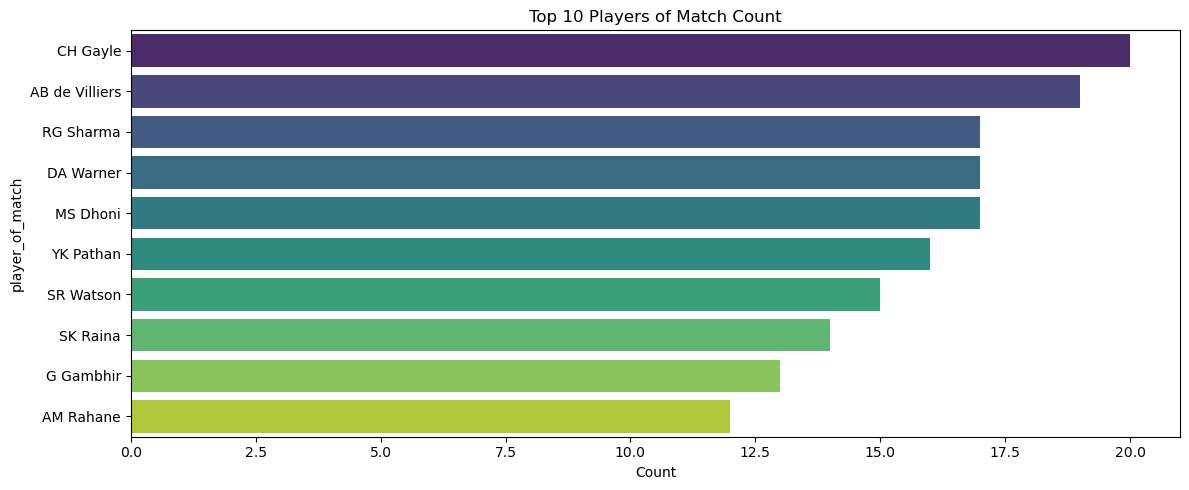

In [41]:
top_players = df['player_of_match'].value_counts().head(10).index
plt.figure(figsize=(12, 5))
sns.countplot(y='player_of_match', data=df[df['player_of_match'].isin(top_players)],
              order=top_players, palette='viridis')
plt.title('Top 10 Players of Match Count')
plt.ylabel('player_of_match')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

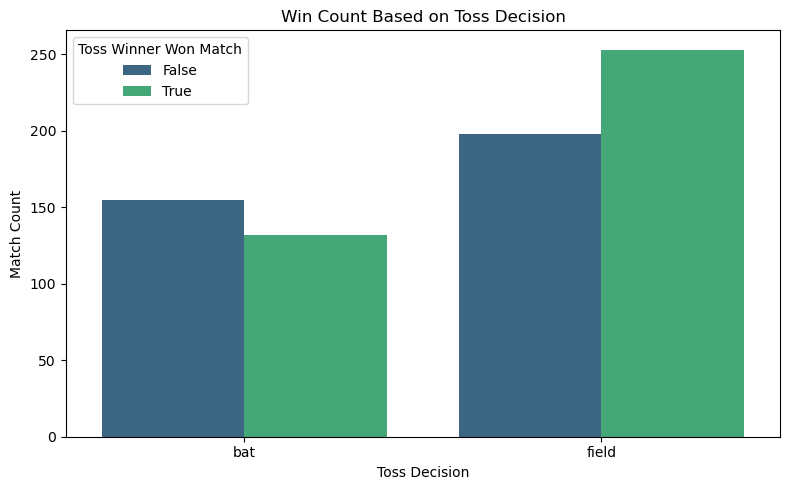

In [42]:
df['toss_winner_match_winner'] = df['toss_winner'] == df['winner']

decision_win_count = df.groupby(['toss_decision', 'toss_winner_match_winner']).size().reset_index(name='count')
plt.figure(figsize=(8, 5))
sns.barplot(x='toss_decision', y='count', hue='toss_winner_match_winner', data=decision_win_count, palette='viridis')
plt.title('Win Count Based on Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Match Count')
plt.legend(title='Toss Winner Won Match')
plt.tight_layout()
plt.show()


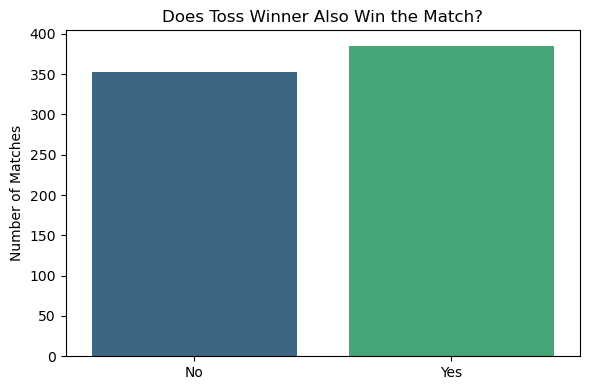

In [43]:
df['toss_winner_match_winner'] = df['toss_winner'] == df['winner']

toss_match_win_counts = df['toss_winner_match_winner'].value_counts().reset_index()
toss_match_win_counts.columns = ['Toss Winner = Match Winner', 'Count']

plt.figure(figsize=(6, 4))
sns.barplot(x='Toss Winner = Match Winner', y='Count', data=toss_match_win_counts, palette='viridis')
plt.title('Does Toss Winner Also Win the Match?')
plt.xlabel('')
plt.ylabel('Number of Matches')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

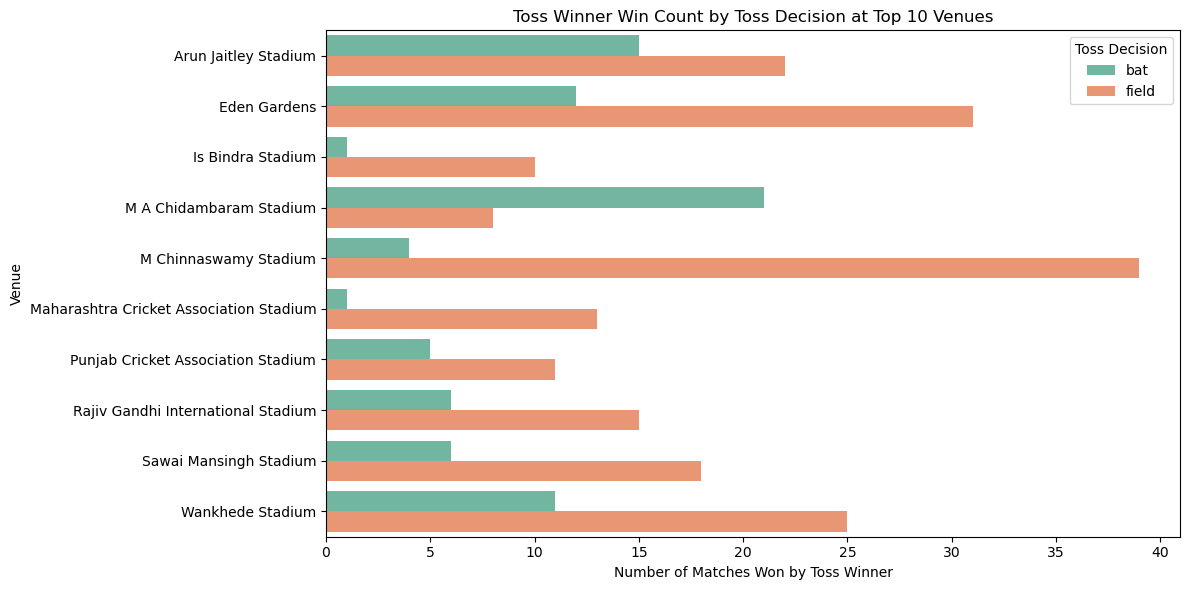

In [44]:
toss_win_df = df[df['toss_winner'] == df['winner']]
venue_toss_win = toss_win_df.groupby(['venue', 'toss_decision']).size().reset_index(name='count')
top_venues = (
    venue_toss_win.groupby('venue')['count'].sum()
    .sort_values(ascending=False).head(10).index
)
venue_toss_win_top = venue_toss_win[venue_toss_win['venue'].isin(top_venues)]
plt.figure(figsize=(12, 6))
sns.barplot(y='venue', x='count', hue='toss_decision', data=venue_toss_win_top, palette='Set2')
plt.title('Toss Winner Win Count by Toss Decision at Top 10 Venues')
plt.ylabel('Venue')
plt.xlabel('Number of Matches Won by Toss Winner')
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()


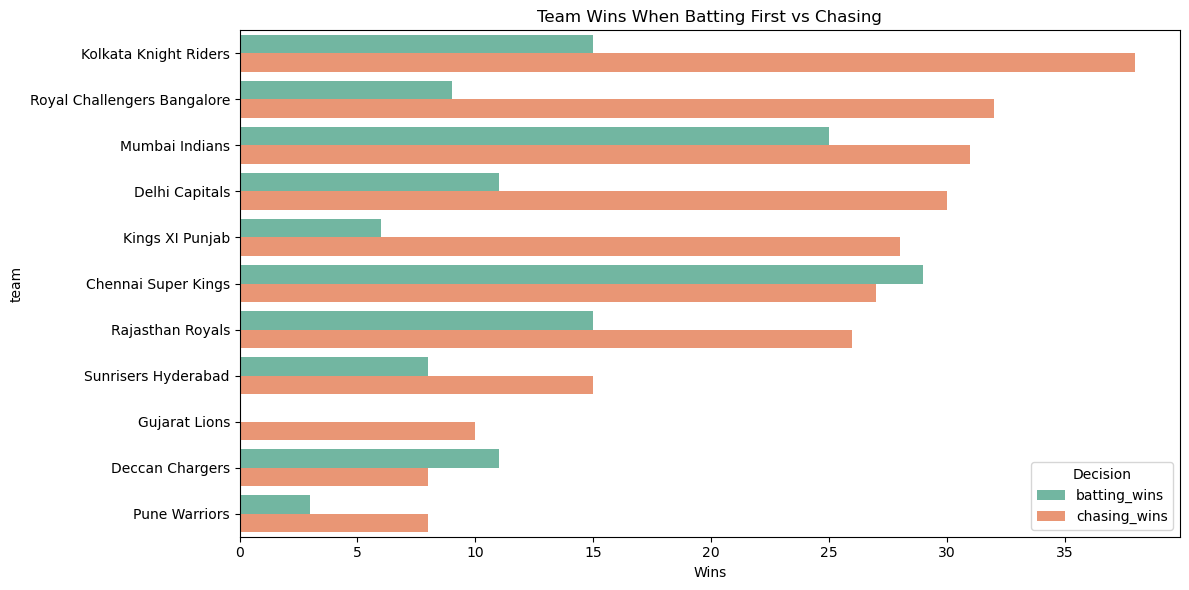

In [45]:
valid_matches = df[df['winner'].notnull()]

batting_wins = valid_matches[(valid_matches['toss_decision'] == 'bat') & (valid_matches['toss_winner'] == valid_matches['winner'])]
chasing_wins = valid_matches[(valid_matches['toss_decision'] == 'field') & (valid_matches['toss_winner'] == valid_matches['winner'])]

batting_counts = batting_wins['winner'].value_counts().reset_index()
batting_counts.columns = ['team', 'batting_wins']

chasing_counts = chasing_wins['winner'].value_counts().reset_index()
chasing_counts.columns = ['team', 'chasing_wins']

bat_vs_chase = pd.merge(batting_counts, chasing_counts, on='team', how='outer').fillna(0)

bat_vs_chase_sorted = bat_vs_chase.sort_values(by='chasing_wins', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=bat_vs_chase_sorted.melt(id_vars='team', var_name='Decision', value_name='Wins'),
            y='team', x='Wins', hue='Decision', palette='Set2')

plt.title('Team Wins When Batting First vs Chasing')
plt.tight_layout()
plt.show()


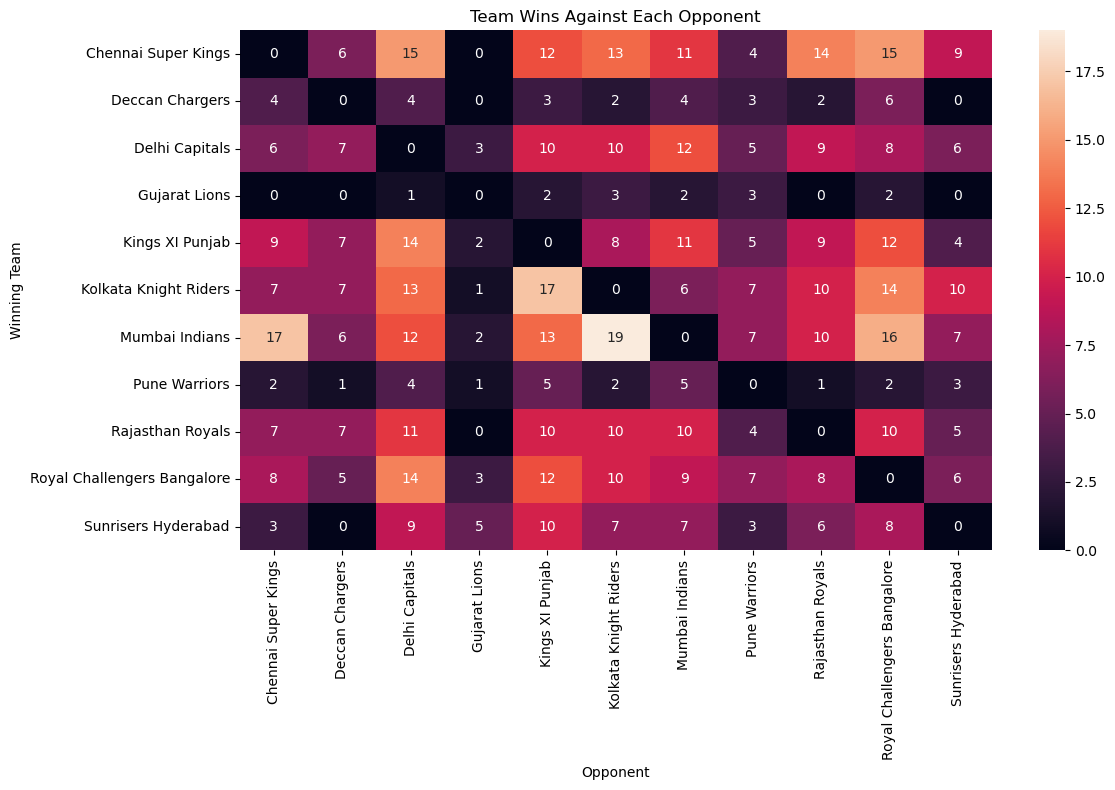

In [47]:
team_matchups = valid_matches[['team1', 'team2', 'winner']].copy()

team_matchups['opponent'] = team_matchups.apply(
    lambda x: x['team2'] if x['winner'] == x['team1'] else x['team1'], axis=1
)
win_matrix = team_matchups.groupby(['winner', 'opponent']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(win_matrix, annot=True, fmt='d')
plt.title('Team Wins Against Each Opponent')
plt.xlabel('Opponent')
plt.ylabel('Winning Team')
plt.tight_layout()
plt.show()

# Machine Learning

In [63]:
df.shape

(738, 16)

In [73]:
df.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,year,venue,toss_winner_match_winner
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,AY Dandekar,NJ Llong,2017,Rajiv Gandhi International Stadium,False
1,Pune,Mumbai Indians,Pune Warriors,Pune Warriors,field,normal,0,Pune Warriors,0,7,SPD Smith,A Nand Kishore,S Ravi,2017,Maharashtra Cricket Association Stadium,True
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Nitin Menon,CK Nandan,2017,Saurashtra Cricket Association Stadium,True
3,Indore,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,AK Chaudhary,C Shamshuddin,2017,Holkar Cricket Stadium,True
4,Bangalore,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,Unknown,Unknown,2017,M Chinnaswamy Stadium,True


In [77]:
df.drop(columns={'umpire1','umpire2','year','toss_winner_match_winner','city','result'},inplace=True)   

df.head(2)

### Feature Transforming

### Label Encoding

In [89]:
label = LabelEncoder()
for column in df.columns:
    df[column] =  label.fit_transform(df[column])

In [91]:
X = df.drop(['winner','win_by_runs','win_by_wickets','dl_applied'], axis=1)
y = df['winner']

### Using RFE for feature selection

In [93]:
es = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=es, n_features_to_select=5)  
rfe.fit(X, y)

RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=5)

In [94]:
col = X.columns[rfe.support_]
print("Selected features by RFE:", col)

Selected features by RFE: Index(['team1', 'team2', 'toss_winner', 'toss_decision', 'venue'], dtype='object')


In [95]:
x = X[col]
x

,team1,team2,toss_winner,toss_decision,venue
0,10,9,9,1,22
1,6,7,7,1,17
2,3,5,5,1,24
3,7,4,4,1,11
4,9,2,9,0,16
...,...,...,...,...,...
751,5,6,6,1,33
752,0,6,0,0,15
753,10,2,2,1,0
754,2,0,0,1,0


In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [97]:
from collections import Counter
count = Counter(y)
print(count)

Counter({6: 109, 0: 99, 5: 92, 9: 82, 4: 81, 2: 76, 8: 74, 10: 58, 1: 28, 7: 26, 3: 13})


### Sampling

In [108]:
sm = SMOTE(random_state=5,k_neighbors=4)
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [110]:
print(Counter(y_sm))

Counter({2: 87, 0: 87, 8: 87, 6: 87, 5: 87, 1: 87, 4: 87, 10: 87, 9: 87, 7: 87, 3: 87})


### Logistic Regresion

In [112]:
cls = LogisticRegression(penalty='l2')
cls.fit(x_sm,y_sm)

LogisticRegression()

In [114]:
y_pred = cls.predict(x_test)
acc1 = accuracy_score(y_pred,y_test)
print(f"Accuracy Score of Logistic Regression: {acc1:.2f}")

Accuracy Score of Logistic Regression: 0.16


In [116]:
y_pred_train = cls.predict(x_sm)
acc1t = accuracy_score(y_pred_train,y_sm)
print(f"Accuracy Score of train data of Logistic Regression: {acc1t:.2f}")

Accuracy Score of train data of Logistic Regression: 0.27


In [117]:
## Confusion Matrix

cm = confusion_matrix(y_pred,y_test)
print(cm)

[[2 0 1 0 4 0 0 0 0 0 0]
 [7 2 2 0 2 1 2 1 1 1 0]
 [3 1 1 0 1 3 0 0 0 0 0]
 [6 1 5 1 3 2 3 0 1 2 0]
 [1 0 1 0 1 0 0 0 3 0 0]
 [0 1 3 0 2 3 2 1 1 1 1]
 [1 1 2 2 2 2 2 1 2 0 2]
 [0 0 0 0 0 0 0 0 1 2 0]
 [0 0 0 0 0 0 8 0 4 4 5]
 [0 0 0 0 0 0 0 1 1 4 0]
 [0 0 0 0 1 7 5 1 1 2 4]]


In [118]:
## Classification report

cr = classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.10      0.29      0.15         7
           1       0.33      0.11      0.16        19
           2       0.07      0.11      0.08         9
           3       0.33      0.04      0.07        24
           4       0.06      0.17      0.09         6
           5       0.17      0.20      0.18        15
           6       0.09      0.12      0.10        17
           7       0.00      0.00      0.00         3
           8       0.27      0.19      0.22        21
           9       0.25      0.67      0.36         6
          10       0.33      0.19      0.24        21

    accuracy                           0.16       148
   macro avg       0.18      0.19      0.15       148
weighted avg       0.23      0.16      0.16       148



#### Both the training accuracy and testing accuracy are very low, which indicates that the model is underfitting.

### One-hot Encoding

In [126]:
cat_cols = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']

df_encoded = pd.get_dummies(df,columns=cat_cols,drop_first=True)
X = df_encoded.drop('winner', axis=1)
Y = df_encoded['winner']
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [129]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=y)

In [130]:
count = Counter(Y)
print(count)

Counter({6: 109, 0: 99, 5: 92, 9: 82, 4: 81, 2: 76, 8: 74, 10: 58, 1: 28, 7: 26, 3: 13})


### Over-Sampling using SMOTE

In [132]:
smo = SMOTE(random_state=5,k_neighbors=4)
x_smo, y_smo = smo.fit_resample(train_x, train_y)

## Logistic Regression

### Cross-Validation

In [142]:
scores = cross_val_score(estimator=LogisticRegression(),X=X,y=Y,scoring='accuracy',cv=5,verbose=2)
print("scores:", scores)
print("Mean accuracy:", scores.mean())

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
scores: [0.56081081 0.58783784 0.5472973  0.44217687 0.5170068 ]
Mean accuracy: 0.5310259238830668


### Logistic Regression Without Sampling

In [145]:
clf = LogisticRegression(penalty='l2')
clf.fit(train_x,train_y)
y_pred = clf.predict(test_x)
accw = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Logistic Regression without sampling: {accw:.2f}")

y_pred_train = clf.predict(train_x)
accwt = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of train data of Logistic Regression without sampling: {accwt:.2f}")

## Classification report

cr = classification_report(y_pred,test_y)
print(cr)

Accuracy Score of Logistic Regression without sampling: 0.53
Accuracy Score of train data of Logistic Regression without sampling: 0.56
              precision    recall  f1-score   support

           0       0.40      0.57      0.47        14
           1       0.17      0.50      0.25         2
           2       0.60      0.38      0.46        24
           3       0.00      0.00      0.00         0
           4       0.69      0.46      0.55        24
           5       0.83      0.79      0.81        19
           6       0.73      0.53      0.62        30
           7       0.00      0.00      0.00         1
           8       0.47      0.64      0.54        11
           9       0.56      0.47      0.51        19
          10       0.25      0.75      0.38         4

    accuracy                           0.53       148
   macro avg       0.43      0.46      0.42       148
weighted avg       0.62      0.53      0.56       148



### Logistic Regression With Sampling

In [152]:
cls = LogisticRegression(penalty = 'l2')
cls.fit(x_smo,y_smo)
y_pred = cls.predict(test_x)
acc2 = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Logistic Regression: {acc2:.2f}")

y_pred_sm = cls.predict(x_smo)
acc2t = accuracy_score(y_pred_sm,y_smo)
print(f"Accuracy Score of train data Logistic Regression: {acc2t:.2f}")

## Classification report

cr = classification_report(y_pred,test_y)
print(cr)

Accuracy Score of Logistic Regression: 0.49
Accuracy Score of train data Logistic Regression: 0.66
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         8
           1       0.50      0.43      0.46         7
           2       0.47      0.32      0.38        22
           3       1.00      1.00      1.00         3
           4       0.62      0.50      0.56        20
           5       0.78      0.70      0.74        20
           6       0.45      0.48      0.47        21
           7       0.20      0.17      0.18         6
           8       0.53      0.57      0.55        14
           9       0.50      0.44      0.47        18
          10       0.33      0.44      0.38         9

    accuracy                           0.49       148
   macro avg       0.51      0.50      0.50       148
weighted avg       0.52      0.49      0.49       148



#### Logistic Regression Summary:

- Without Sampling:
   - Train Accuracy: 56%
   - Test Accuracy: 53%
   - Mean Cross-Validation Accuracy: 53%

- The model is performing consistently across training, test, and CV. There’s no major overfitting, and generalisation is reasonable.

- With Sampling:
    - Train Accuracy: 66%
    - Test Accuracy: 49%
    
- The model fits better on the training data after sampling, but test accuracy drops, showing possible overfitting. It’s learning more from the training set but not generalising as well to new data.

#### Without sampling, the model gives a more balanced and reliable performance. With sampling, training accuracy increases, but test accuracy drops, which may suggest overfitting. So, in this case, training without sampling is giving better and more stable results.

## K-Nearest Neighbors [KNN] - One-hot Encoding

### Cross Validation

In [158]:
scores = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=5,metric='hamming'),X=X,y=Y,scoring='accuracy',cv=5,verbose=2)
print("scores:", scores)
print("Mean accuracy:", scores.mean())

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
scores: [0.7027027  0.66216216 0.68243243 0.70068027 0.69387755]
Mean accuracy: 0.6883710240853098


### KNN without Sampling

In [161]:
knnws = KNeighborsClassifier(n_neighbors=5,metric='hamming')
knnws.fit(train_x,train_y)
y_pred = knnws.predict(test_x)
acckws = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of KNN without sampling: {acckws:.2f}")

y_pred_train = knnws.predict(train_x)
acckwst = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of Train data KNN without sampling: {acckwst:.2f}")

Accuracy Score of KNN without sampling: 0.72
Accuracy Score of Train data KNN without sampling: 0.82


### KNN with Sampling

In [164]:
knn = KNeighborsClassifier(n_neighbors=5,metric='hamming')
knn.fit(x_smo,y_smo)
y_pred = knn.predict(test_x)
acc3 = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of KNN: {acc3:.2f}")

y_pred_sm = knn.predict(x_smo)
acc3t = accuracy_score(y_pred_sm,y_smo)
print(f"Accuracy Score of train data KNN: {acc3t:.2f}")

Accuracy Score of KNN: 0.79
Accuracy Score of train data KNN: 0.88


### K-Nearest Neighbors (KNN) Performance Summary

#### Without Sampling:
- Train Accuracy: 82%
- Test Accuracy: 72%
- Mean Cross-Validation Accuracy: 68.8%

The model performs well on training data and fairly well on the test set.  
The gap between train and test (82% → 72%) shows mild overfitting, but it's within an acceptable range.  
Cross-validation accuracy is close to test accuracy, meaning the model is generalising well.

#### With Sampling:
- Train Accuracy: 86%
- Test Accuracy: 79%

After sampling, both training and test accuracy improved.  
The train-test gap (86% → 79%) is still reasonable, showing better fit and improved generalisation.

After applying sampling, the KNN model improved in both training and test accuracy.  
The gap between them is not too large, which means the model is learning well without overfitting much.  
Overall, sampling helped the KNN model perform better and generalise more effectively.


#### Used Hamming metrics since it has many Categorical columns, so Accuracy is Good when compared to Logistic regression

### Finding the K value by using Elbow method

In [169]:
def Elbow(K):
    test_error = []
    for i in K:
        clf = KNeighborsClassifier(n_neighbors=i,metric="hamming")
        clf.fit(train_x,train_y)
        tmp = clf.predict(test_x)
        tmp = accuracy_score(tmp,test_y)
        error = 1 - tmp
        test_error.append(error)
    return test_error

k = range(2,10,2)
new_k = Elbow(k)

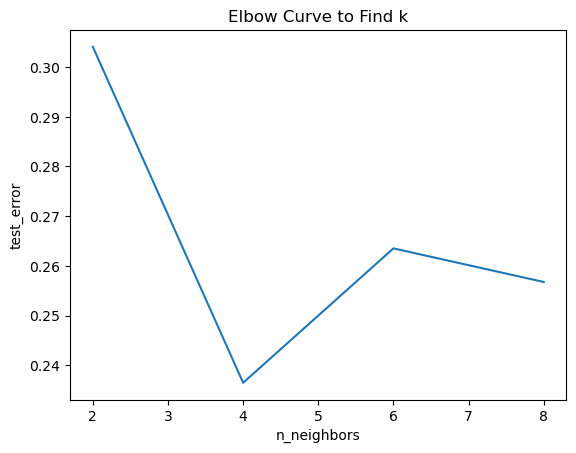

In [171]:
plt.plot(k,new_k)
plt.xlabel('n_neighbors')
plt.ylabel('test_error')
plt.title('Elbow Curve to Find k')
plt.show()

In [172]:
knnws = KNeighborsClassifier(n_neighbors=4,metric='hamming')
knnws.fit(train_x,train_y)
y_pred = knnws.predict(test_x)
acckws = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of KNN without sampling: {acckws:.2f}")

y_pred_train = knnws.predict(train_x)
acckwst = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of Train data KNN without sampling: {acckwst:.2f}")

Accuracy Score of KNN without sampling: 0.76
Accuracy Score of Train data KNN without sampling: 0.84


In [174]:
def Elbow(K):
    test_error = []
    for i in K:
        clf = KNeighborsClassifier(n_neighbors=i,metric="hamming")
        clf.fit(x_smo,y_smo)
        tmp = clf.predict(test_x)
        tmp = accuracy_score(tmp,test_y)
        error = 1 - tmp
        test_error.append(error)
    return test_error

k = range(2,10,2)
new_k = Elbow(k)

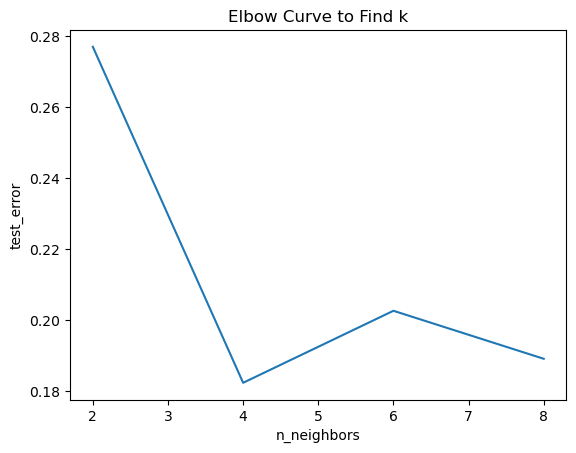

In [176]:
plt.plot(k,new_k)
plt.xlabel('n_neighbors')
plt.ylabel('test_error')
plt.title('Elbow Curve to Find k')
plt.show()

In [178]:
knnt = KNeighborsClassifier(n_neighbors=4,metric='hamming')
knnt.fit(x_smo,y_smo)
y_pred = knnt.predict(test_x)
acc3k = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of KNN for best K: {acc3k:.2f}")

y_pred_sm = knnt.predict(x_smo)
acc3tk = accuracy_score(y_pred_sm,y_smo)
print(f"Accuracy Score of train data KNN for best K: {acc3tk:.2f}")

Accuracy Score of KNN for best K: 0.82
Accuracy Score of train data KNN for best K: 0.90


#### By tuning k,It increases in both cases with sampling and without sampling

## Navie-Bayes =>  Bernoulli NB

- since it has Categorical Independent values, we can go with Bernoulli NB

### Cross Validation

In [184]:
scores = cross_val_score(estimator=BernoulliNB(),X=X,y=Y,scoring='accuracy',cv=5,verbose=2)
print("scores:", scores)
print("Mean accuracy:", scores.mean())

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
scores: [0.51351351 0.5472973  0.53378378 0.47619048 0.55102041]
Mean accuracy: 0.5243610957896672


### Without Sampling

In [187]:
nbws = BernoulliNB()
nbws.fit(train_x,train_y)
y_pred = nbws.predict(test_x)
accnws = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Navie-Bayes => Bernoulli NB without sampling: {accnws:.2f}")

y_pred_train = nbws.predict(train_x)
accnwst = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of train data Navie-Bayes => Bernoulli NB without sampling: {accnwst:.2f}")

Accuracy Score of Navie-Bayes => Bernoulli NB without sampling: 0.53
Accuracy Score of train data Navie-Bayes => Bernoulli NB without sampling: 0.62


### With Sampling

In [190]:
nb = BernoulliNB()
nb.fit(x_smo,y_smo)
y_pred = nb.predict(test_x)
accNB = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Navie-Bayes => Bernoulli NB: {accNB:.2f}")

y_pred_train = nb.predict(x_smo)
accNBT = accuracy_score(y_pred_train,y_smo)
print(f"Accuracy Score of train data Navie-Bayes => Bernoulli NB: {accNBT:.2f}")

Accuracy Score of Navie-Bayes => Bernoulli NB: 0.53
Accuracy Score of train data Navie-Bayes => Bernoulli NB: 0.70


### Bernoulli Naive Bayes – Performance Summary

#### Without Sampling:
- Train Accuracy: 62%
- Test Accuracy: 53%
- Mean Cross-Validation Accuracy: 52%

The model performs fairly well without sampling.  
The small gap between training and test accuracy indicates that the model is generalising reasonably and is not overfitting.

#### With Sampling:
- Train Accuracy: 70%
- Test Accuracy: 53%

After applying sampling, the training accuracy increased, but the test accuracy did not improve.  
This suggests that the model may be overfitting to the training data created by sampling.

Sampling increased the training accuracy but did not help with the test accuracy.  
Since the performance on new data stayed the same and the gap widened, the model without sampling is more stable and reliable in this case.


## Support vector Machine

### Cross-Validation

In [195]:
scores = cross_val_score(estimator=SVC(),X=X,y=Y,scoring='accuracy',cv=5,verbose=2)
print("scores:", scores)
print("Mean accuracy:", scores.mean())

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
scores: [0.18918919 0.19594595 0.20945946 0.17006803 0.19727891]
Mean accuracy: 0.19238830667402096


### With Sampling

In [197]:
sv = SVC()
sv.fit(x_smo,y_smo)
y_pred = sv.predict(test_x)
accsv = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Support Vector Machine: {accsv:.2f}")

y_pred_train = sv.predict(x_smo)
accsvT = accuracy_score(y_pred_train,y_smo)
print(f"Accuracy Score of train data Support Vector Machine: {accsvT:.2f}")

Accuracy Score of Support Vector Machine: 0.10
Accuracy Score of train data Support Vector Machine: 0.24


### Without Sampling

In [200]:
sv = SVC()
sv.fit(train_x,train_y)
y_pred = sv.predict(test_x)
accsv = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Support Vector Machine without Sampling: {accsv:.2f}")

y_pred_train = sv.predict(train_x)
accsvT = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of train data Support Vector Machine without Sampling: {accsvT:.2f}")

Accuracy Score of Support Vector Machine without Sampling: 0.18
Accuracy Score of train data Support Vector Machine without Sampling: 0.23


### Label Encoding

In [203]:
sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
accsvl = accuracy_score(y_pred,y_test)
print(f"Accuracy Score of Support Vector Machine - Label Encoding without Sampling: {accsvl:.2f}")

y_pred_train = sv.predict(x_train)
accsvlT = accuracy_score(y_pred_train,y_train)
print(f"Accuracy Score of train data Support Vector Machine - Label Encoding without Sampling: {accsvlT:.2f}")

Accuracy Score of Support Vector Machine - Label Encoding without Sampling: 0.43
Accuracy Score of train data Support Vector Machine - Label Encoding without Sampling: 0.42


### Hyper Parameter tunning

In [207]:
param_grid = {
    'C':[0.1,1,10,100], 
    'kernel':['linear','rbf'], 
     'gamma':['scale','auto']
}

In [209]:
grid_search = GridSearchCV(estimator=SVC(),param_grid = param_grid,cv=5,verbose=2,n_jobs = -1)
grid_search.fit(train_x,train_y)

best_param = grid_search.best_params_
best_score= grid_search.best_score_

print(f"Best hyperparameters: {best_param}")
print(f"Best Cross validation Score: {best_score:.2f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross validation Score: 0.62


In [210]:
best_model = grid_search.best_estimator_
best_model.fit(train_x,train_y)
y_pred = best_model.predict(test_x)
accsvu = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Support Vector Machine without Sampling(Tunning): {accsvu:.2f}")

y_pred_train = best_model.predict(train_x)
accsvTu = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of train data Support Vector Machine without Sampling(Tunning): {accsvTu:.2f}")

Accuracy Score of Support Vector Machine without Sampling(Tunning): 0.65
Accuracy Score of train data Support Vector Machine without Sampling(Tunning): 0.95


In [211]:
best_model = grid_search.best_estimator_
best_model.fit(x_smo,y_smo)
y_pred = best_model.predict(test_x)
accsu = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Support Vector Machine(Tunning): {accsu:.2f}")

y_pred_train = best_model.predict(x_smo)
accsTu = accuracy_score(y_pred_train,y_smo)
print(f"Accuracy Score of train data Support Vector Machine(Tunning): {accsTu:.2f}")

Accuracy Score of Support Vector Machine(Tunning): 0.64
Accuracy Score of train data Support Vector Machine(Tunning): 0.93


In [212]:
best_model = grid_search.best_estimator_
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
accsul = accuracy_score(y_pred,y_test)
print(f"Accuracy Score of Support Vector Machine - Label Encoder(Tunning): {accsul:.2f}")

y_pred_train = best_model.predict(x_train)
accsTul = accuracy_score(y_pred_train,y_train)
print(f"Accuracy Score of train data Support Vector Machine- Label Encoder(Tunning): {accsTul:.2f}")

Accuracy Score of Support Vector Machine - Label Encoder(Tunning): 0.25
Accuracy Score of train data Support Vector Machine- Label Encoder(Tunning): 0.29


### Support‑Vector Machine (SVM) ‒ Performance Summary

**Before tuning**
• Train accuracy 0.24, test accuracy 0.10–0.18 → the SVM was under‑fitting (it hadn’t learned the patterns).

**After tuning**
• Train accuracy jumped to 0.93–0.95, but test accuracy only reached 0.64–0.65 → the SVM is now over‑fitting (memorising the training set but not generalising).

The SVM is overfitting because,

Small dataset – With fewer rows, the model easily memorizes the data.

Many classes – Handling 12 classes with limited data makes learning harder.

One-hot encoding – Creates high-dimensional sparse data, making distance-based learning less reliable.

Before tuning (label‑encoded features, no sampling):
Train accuracy 0.42, test accuracy 0.43 ⇒ model is underfitting but train‑test scores match.

After tuning:
Train accuracy rises to 0.63 while test accuracy edges up to 0.48 ⇒ a small gain on unseen data, but the larger gap shows mild overfitting.

So, tuning helped a little, yet the model still struggles and now fits the training data more tightly than the test data.



## Decision tree

### Cross Validation

In [216]:
scores = cross_val_score(estimator=DecisionTreeClassifier(random_state=42),X=X,y=Y,scoring='accuracy',cv=5,verbose=2)
print("scores:", scores)
print("Mean accuracy:", scores.mean())

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
scores: [0.85810811 0.88513514 0.91216216 0.82993197 0.85714286]
Mean accuracy: 0.8684960470674756


### Without Sampling

In [218]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_x,train_y)
y_pred = dt.predict(test_x)
accdt = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Decision Tree without sampling: {accdt:.2f}")

y_pred_train = dt.predict(train_x)
accdtt = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of train data of Decision Tree without sampling: {accdtt:.2f}")

Accuracy Score of Decision Tree without sampling: 0.93
Accuracy Score of train data of Decision Tree without sampling: 1.00


### With Sampling

In [220]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_smo,y_smo)
y_pred = dt.predict(test_x)
accdts = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Decision Tree: {accdts:.2f}")

y_pred_train = dt.predict(x_smo)
accdtts = accuracy_score(y_pred_train,y_smo)
print(f"Accuracy Score of train data of Decision Tree: {accdtts:.2f}")

Accuracy Score of Decision Tree: 0.94
Accuracy Score of train data of Decision Tree: 1.00


### Hyper Parameter Tunning

In [222]:
param_grid = {
    "criterion":["gini", "entropy"],
    "max_depth":[None, 5, 10, 20],
}


In [223]:
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,verbose=2,scoring='accuracy',n_jobs=-1)
grid_search.fit(train_x,train_y)

best_param = grid_search.best_params_
best_score= grid_search.best_score_

print(f"Best hyperparameters: {best_param}")
print(f"Best Cross validation Score: {best_score:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': None}
Best Cross validation Score: 0.83


In [224]:
best_model = grid_search.best_estimator_
best_model.fit(train_x,train_y)
y_pred = best_model.predict(test_x)
accdt = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Decision Tree after Tunning: {accdt:.2f}")

y_pred_train = best_model.predict(train_x)
accdtt = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of train data of Decision Tree After tunning: {accdtt:.2f}")

Accuracy Score of Decision Tree after Tunning: 0.93
Accuracy Score of train data of Decision Tree After tunning: 1.00


### Tree Plot

[Text(0.917730248492697, 0.9833333333333333, 'x[16] <= 0.5\ngini = 0.909\nsamples = 957\nvalue = [87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87]'),
 Text(0.868069192637568, 0.95, 'x[15] <= 0.5\ngini = 0.904\nsamples = 885\nvalue = [87, 87, 87, 18, 86, 87, 87, 87, 87, 85, 87]'),
 Text(0.8928997205651326, 0.9666666666666666, 'True  '),
 Text(0.8013557765794836, 0.9166666666666666, 'x[18] <= 0.5\ngini = 0.899\nsamples = 783\nvalue = [79, 85, 27, 17, 82, 82, 79, 85, 83, 80, 84]'),
 Text(0.7331463357676631, 0.8833333333333333, 'x[21] <= 0.5\ngini = 0.896\nsamples = 702\nvalue = [75, 85, 26, 17, 78, 31, 72, 84, 75, 79, 80]'),
 Text(0.6619448454483695, 0.85, 'x[17] <= 0.5\ngini = 0.891\nsamples = 625\nvalue = [69, 85, 22, 17, 71, 30, 69, 84, 26, 76, 76]'),
 Text(0.5956288213315217, 0.8166666666666667, 'x[22] <= 0.5\ngini = 0.884\nsamples = 547\nvalue = [63, 83, 21, 17, 23, 27, 65, 83, 23, 70, 72]'),
 Text(0.528214164402174, 0.7833333333333333, 'x[23] <= 0.5\ngini = 0.875\nsamples = 457\nvalue = 

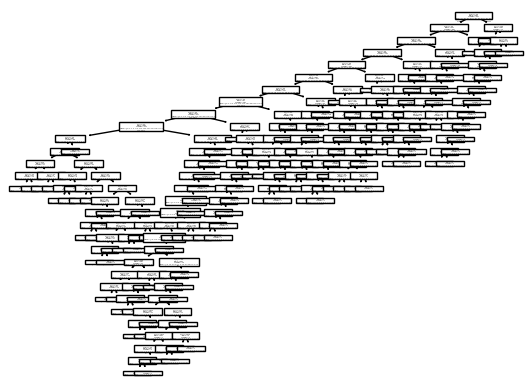

In [294]:
from sklearn import tree
tree.plot_tree(dt)

### Decision Tree – Summary

The Decision Tree model achieved 100% accuracy on the training data and around 93–94% on the test data. This high performance may be due to the relatively small dataset (only around 700+ rows), which makes it easier for the model to learn patterns effectively.

Although the training accuracy is perfect, the difference between training and test accuracy is small, and the cross-validation mean accuracy is also close (around 87%).

Overall, the model appears to be generalising well.


## Random Forest

### Cross Validation

In [228]:
scores = cross_val_score(estimator=RandomForestClassifier(oob_score=True,random_state=42),X=X,y=Y,scoring='accuracy',cv=5,verbose=2)
print("scores:", scores)
print("Mean accuracy:", scores.mean())

[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
scores: [0.88513514 0.90540541 0.88513514 0.9047619  0.9047619 ]
Mean accuracy: 0.897039897039897


### Without Sampling

In [230]:
rf = RandomForestClassifier(oob_score=True,random_state=42)
rf.fit(train_x,train_y)
y_pred = rf.predict(test_x)
accrf = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Random Forest without sampling: {accrf:.2f}")

y_pred_train = dt.predict(train_x)
accrft = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of train data of Random Forest without sampling: {accrft:.2f}")

Accuracy Score of Random Forest without sampling: 0.90
Accuracy Score of train data of Random Forest without sampling: 1.00


### Hyper Parameter Tunning

In [232]:
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth':[None,10,20,30], 
    'min_samples_split':[2,5,10] 
}

In [233]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
grid_search.fit(train_x,train_y)

best_param = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best param is {best_param}")
print(f"Best score is {best_score}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best param is {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best score is 0.8677966101694915


In [234]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_x)
accrfh = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Random Forest without sampling(Tunning): {accrfh:.2f}")

y_pred_train = best_model.predict(train_x)
accrfth = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of train data Random Forest without sampling(Tunning): {accrfth:.2f}")

Accuracy Score of Random Forest without sampling(Tunning): 0.91
Accuracy Score of train data Random Forest without sampling(Tunning): 1.00


In [235]:
print("OOB score of the random forest: ",best_model.oob_score_)

OOB score of the random forest:  0.847457627118644


### Random Forest – Summary

The Random Forest model got 100% accuracy on the training data and about 90–91% on the test data. Since the dataset has only around 700 rows, getting perfect accuracy on training is possible.

The small difference between training and test accuracy shows that the model is not overfitting and is generalising well. The cross-validation accuracy is also close to the test accuracy, which means the model performs consistently across different data splits.

After tuning, the test accuracy improved slightly from 90% to 91%, while the training accuracy stayed the same. This means tuning helped a bit, and overall the model is working well on this dataset.


# Boosting 

## Ada Boost

In [239]:
scores = cross_val_score(estimator=AdaBoostClassifier(n_estimators=50,random_state=40),X=X,y=Y,scoring='accuracy',cv=5,verbose=2)
print("scores:", scores)
print("Mean accuracy:", scores.mean())

[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
scores: [0.22297297 0.24324324 0.20945946 0.25170068 0.23809524]
Mean accuracy: 0.23309431880860454


### Without Sampling

In [241]:
ada = AdaBoostClassifier(n_estimators=50,random_state=40)
ada.fit(train_x,train_y)
y_pred = ada.predict(test_x)
accad = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Adaboost without sampling: {accad:.2f}")

y_pred_train = ada.predict(train_x)
accadt = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of Adaboost without sampling: {accadt:.2f}")

Accuracy Score of Adaboost without sampling: 0.24
Accuracy Score of Adaboost without sampling: 0.23


### With Sampling

In [243]:
ada = AdaBoostClassifier(n_estimators=50,random_state=40)
ada.fit(x_smo,y_smo)
y_pred = ada.predict(test_x)
accad = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of Adaboost without sampling: {accad:.2f}")

y_pred_train = ada.predict(x_smo)
accadt = accuracy_score(y_pred_train,y_smo)
print(f"Accuracy Score of Adaboost without sampling: {accadt:.2f}")

Accuracy Score of Adaboost without sampling: 0.31
Accuracy Score of Adaboost without sampling: 0.38


### Hyper Parameter Tunning

In [245]:
adab = AdaBoostClassifier(estimator=DecisionTreeClassifier(),random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3],
    'estimator__min_samples_split': [2, 5]
}

In [246]:
grid_search = GridSearchCV(estimator=adab,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
grid_search.fit(train_x,train_y)

best_param = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best param is {best_param}")
print(f"Best score is {best_score}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best param is {'estimator__max_depth': 3, 'estimator__min_samples_split': 5, 'learning_rate': 0.01, 'n_estimators': 100}
Best score is 0.8627118644067796


In [247]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_x)
accad = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of AdaBoost without sampling(Tunning): {accad:.2f}")

y_pred_train = best_model.predict(train_x)
accadt = accuracy_score(y_pred_train,train_y)
print(f"Accuracy Score of train data AdaBoost without sampling(Tunning): {accadt:.2f}")

Accuracy Score of AdaBoost without sampling(Tunning): 0.93
Accuracy Score of train data AdaBoost without sampling(Tunning): 1.00


### AdaBoost – Summary

Before tuning, the AdaBoost model showed low accuracy (between 23% and 38%), which means it was underfitting and couldn't learn the data well.

After tuning, the accuracy increased significantly to 93%, and the training accuracy became 100%. This improvement happened mainly because the base estimator was changed to a Decision Tree, which is more powerful and can capture complex patterns better.

Although training accuracy is perfect, the cross-validation score of around 86% and test accuracy of 93% show that the model is generalising well and tuning was effective.


## G-Boost

In [250]:
scores = cross_val_score(estimator=GradientBoostingClassifier(n_estimators=100,random_state=40),X=X,y=Y,scoring='accuracy',cv=5,verbose=2)
print("scores:", scores)
print("Mean accuracy:", scores.mean())

[CV] END .................................................... total time=   3.2s
[CV] END .................................................... total time=   3.1s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.5s
scores: [0.96621622 0.97972973 0.97972973 0.95238095 0.97959184]
Mean accuracy: 0.9715296929582644


In [251]:
g = GradientBoostingClassifier(n_estimators=100,random_state=40)
g.fit(train_x,train_y)
y_pred = g.predict(test_x)
accg = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of GBoost without sampling: {accg:.2f}")

y_pred = g.predict(train_x)
accgt = accuracy_score(y_pred,train_y)
print(f"Accuracy Score of train data of GBoost without sampling: {accgt:.2f}")

Accuracy Score of GBoost without sampling: 0.99
Accuracy Score of train data of GBoost without sampling: 1.00


### Gradient Boosting – Summary

The Gradient Boosting model achieved 99% accuracy on the test data and 100% on the training data. The mean cross-validation accuracy was also very high at around 97%.

This strong performance is likely due to the small dataset, which makes it easier for the model to learn effectively. The small gap between train and test accuracy shows that the model is generalising well and not overfitting.

Since the model performs very well even without sampling or hyperparameter tuning, it can be considered one of the best models for this dataset as-is.


## XGBoost

### Cross Validation

In [255]:
scores = cross_val_score(estimator=XGBClassifier(),X=X,y=Y,scoring='accuracy',cv=5,verbose=2)
print("scores:", scores)
print("Mean accuracy:", scores.mean())

[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
scores: [0.96621622 0.97972973 0.98648649 0.94557823 0.92517007]
Mean accuracy: 0.960636146350432


In [256]:
xgb = XGBClassifier()
xgb.fit(train_x,train_y)
y_pred = xgb.predict(test_x)
accxg = accuracy_score(y_pred,test_y)
print(f"Accuracy Score of XGBoost without sampling: {accxg:.2f}")

y_pred = xgb.predict(train_x)
accxgt = accuracy_score(y_pred,train_y)
print(f"Accuracy Score of train data of XGBoost without sampling: {accxgt:.2f}")

Accuracy Score of XGBoost without sampling: 0.98
Accuracy Score of train data of XGBoost without sampling: 1.00


### XGBoost – Summary

The XGBoost model reached 100 % accuracy on the training data and 98 % accuracy on the test data, with a mean cross‑validation accuracy of about 96 %.

The tiny gap between train, test, and CV scores indicates that the model generalises very well on this relatively small dataset. It already performs at a high level without any sampling or additional hyperparameter tuning.


| Model / Variant                              | Sampling | Encoding    | Tuned | Train Acc | Test Acc | CV Acc (mean / best) |
|----------------------------------------------|----------|-------------|-------|-----------|----------|----------------------|
| **Logistic Regression**                      | No       | One‑hot     | No    | 0.56      | 0.53     | 0.53 (mean)          |
| Logistic Regression                          | Yes      | One‑hot     | No    | 0.66      | 0.49     | –                    |
| **K‑Nearest Neighbours**                     | No       | One‑hot     | No    | 0.82      | 0.72     | 0.69 (mean)          |
| KNN                                          | Yes      | One‑hot     | No    | 0.86      | 0.79     | –                    |
| **Bernoulli Naive Bayes**                    | No       | One‑hot     | No    | 0.62      | 0.53     | 0.52 (mean)          |
| Bernoulli NB                                 | Yes      | One‑hot     | No    | 0.70      | 0.53     | –                    |
| **SVM (one‑hot)**                            | No       | One‑hot     | No    | 0.24      | 0.10 – 0.18 | 0.19 (mean)        |
| SVM (one‑hot)                                | No       | One‑hot     | Yes   | 0.93–0.95 | 0.64–0.65 | 0.65 (best)         |
| **SVM (label‑encoded)**                      | No       | Label       | No    | 0.42      | 0.43     | –                    |
| SVM (label‑encoded)                          | No       | Label       | Yes   | 0.63      | 0.48     | –                    |
| **Decision Tree**                            | No       | One‑hot     | No    | 1.00      | 0.93     | 0.87 (mean)          |
| Decision Tree                                | Yes      | One‑hot     | No    | 1.00      | 0.94     | –                    |
| Decision Tree                                | No       | One‑hot     | Yes   | 1.00      | 0.93     | 0.83 (best fold)     |
| **Random Forest**                            | No       | One‑hot     | No    | 1.00      | 0.90     | 0.90 (mean)          |
| Random Forest                                | No       | One‑hot     | Yes   | 1.00      | 0.91     | 0.87 (best)          |
| **Gradient Boosting**                        | No       | One‑hot     | No    | 1.00      | 0.99     | 0.97 (mean)          |
| **XGBoost**                                  | No       | One‑hot     | No    | 1.00      | 0.98     | 0.96 (mean)          |
| **AdaBoost**                                 | No       | One‑hot     | No    | 0.23–0.38 | 0.23–0.38 | 0.23 (mean)         |
| AdaBoost                                     | No       | One‑hot     | Yes   | 1.00      | 0.93     | 0.86 (best)          |


## Best Model

- GBoost and XGBoost

In [260]:
import joblib
joblib.dump((g, X.columns.tolist(), label_encoder), "gboost_model.pkl")



['gboost_model.pkl']